In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [104]:
customer_dataframe = pd.read_csv("Mall_Customers.csv")

In [105]:
customer_dataframe

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [106]:
# Performing Univariate Analysis

customer_dataframe.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

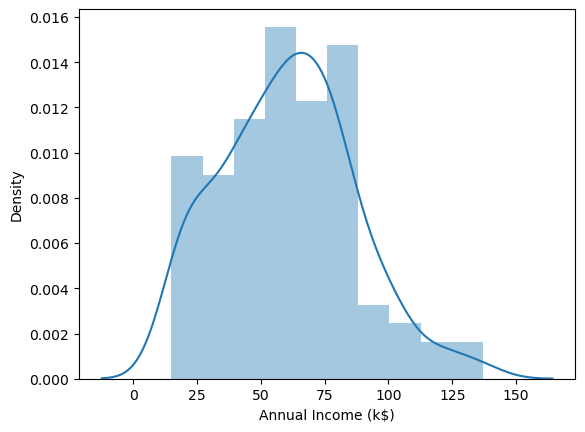

In [107]:
sns.distplot(customer_dataframe['Annual Income (k$)'])

In [108]:
customer_dataframe.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

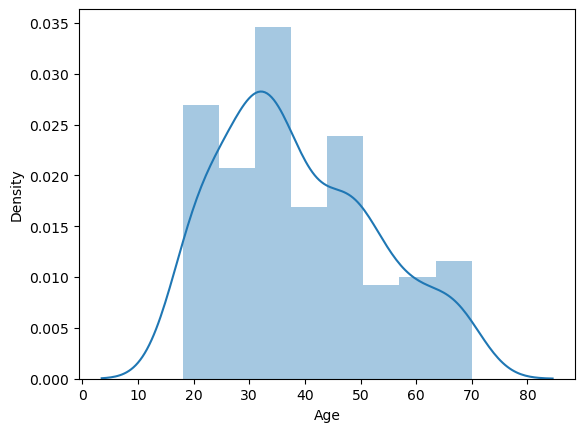

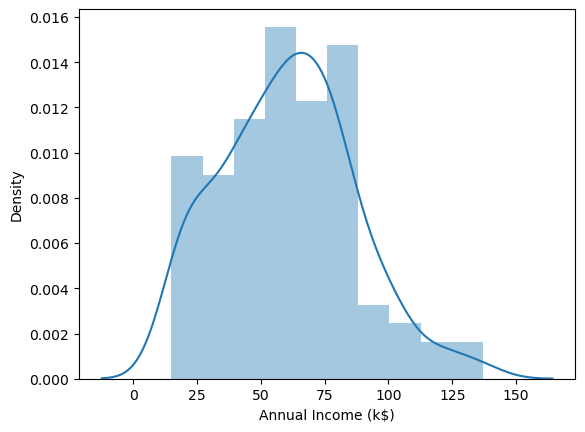

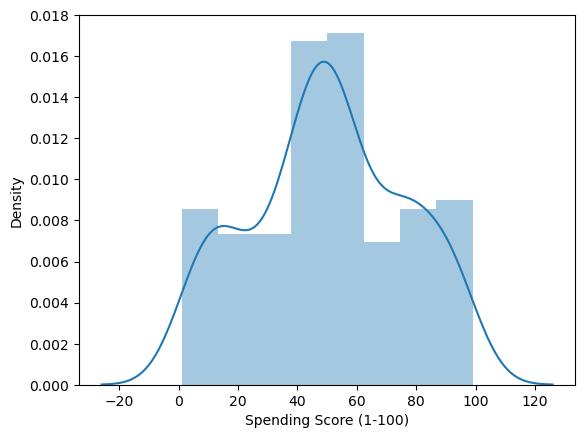

In [109]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(customer_dataframe[i])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

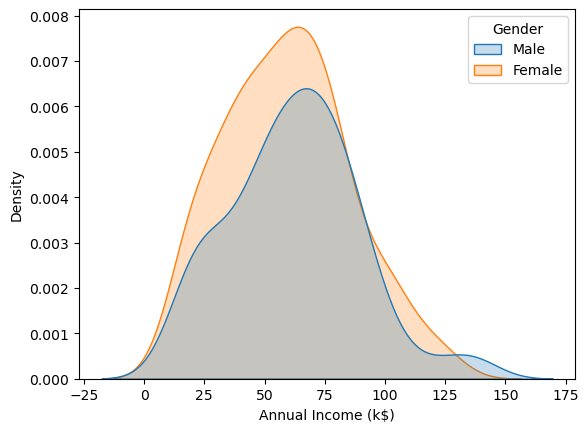

In [110]:
sns.kdeplot(x=customer_dataframe['Annual Income (k$)'], shade=True, hue = customer_dataframe['Gender'])

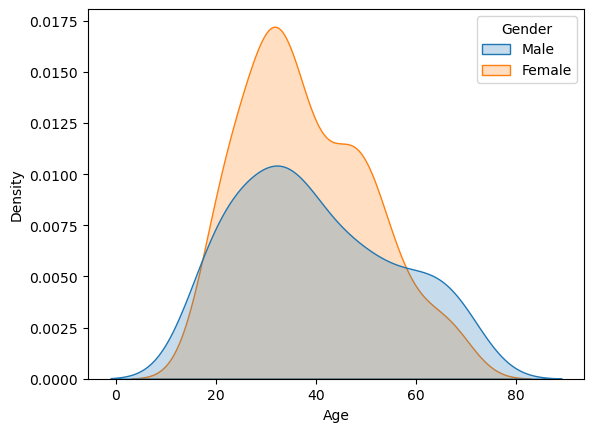

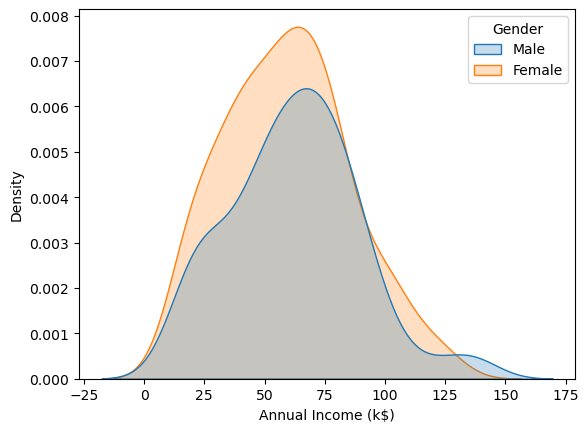

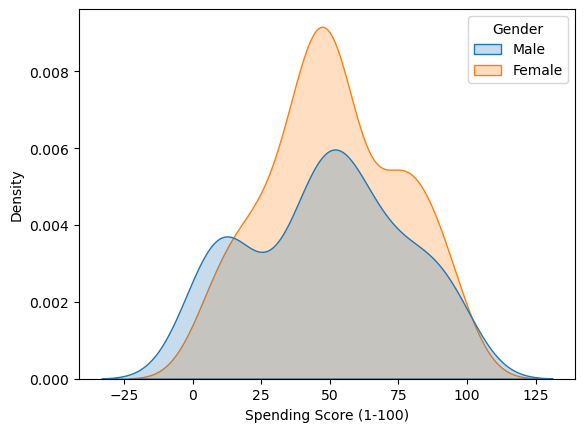

In [111]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(x=customer_dataframe[i], shade=True, hue = customer_dataframe['Gender'])

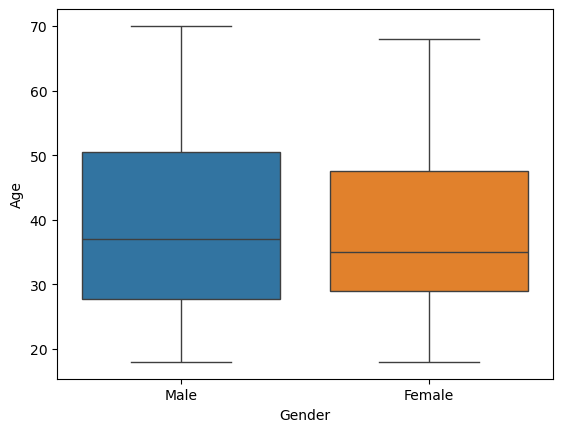

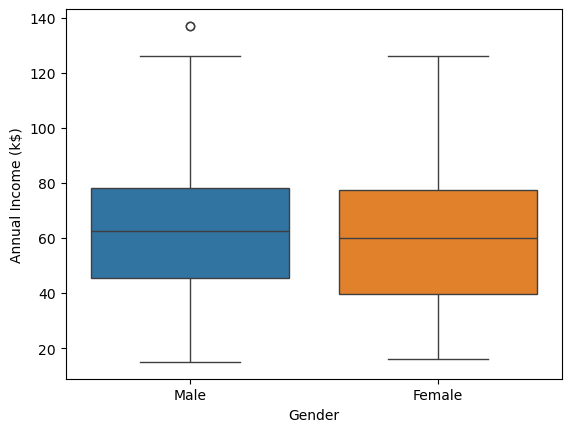

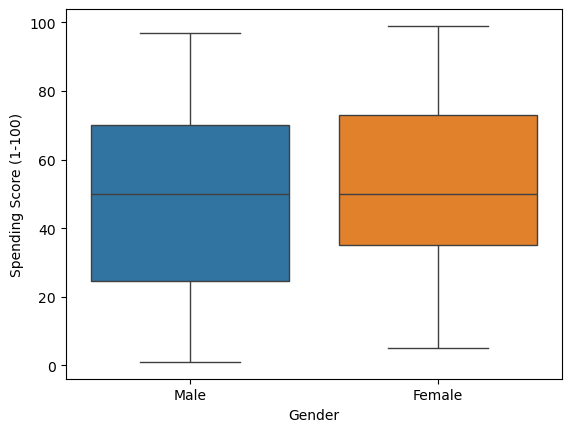

In [112]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=customer_dataframe, x='Gender', y=customer_dataframe[i], hue = customer_dataframe['Gender'])

In [113]:
# Performing Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

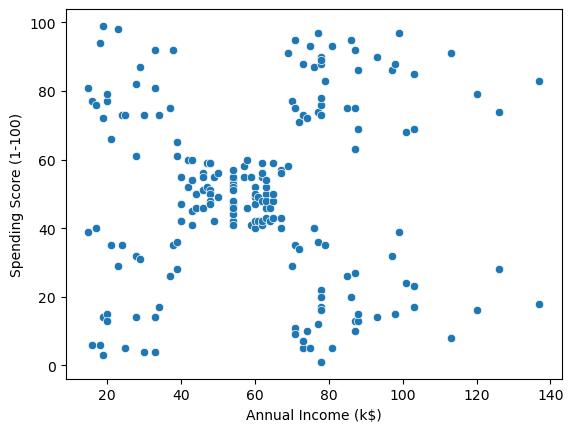

In [114]:
sns.scatterplot(data=customer_dataframe, x='Annual Income (k$)', y='Spending Score (1-100)')

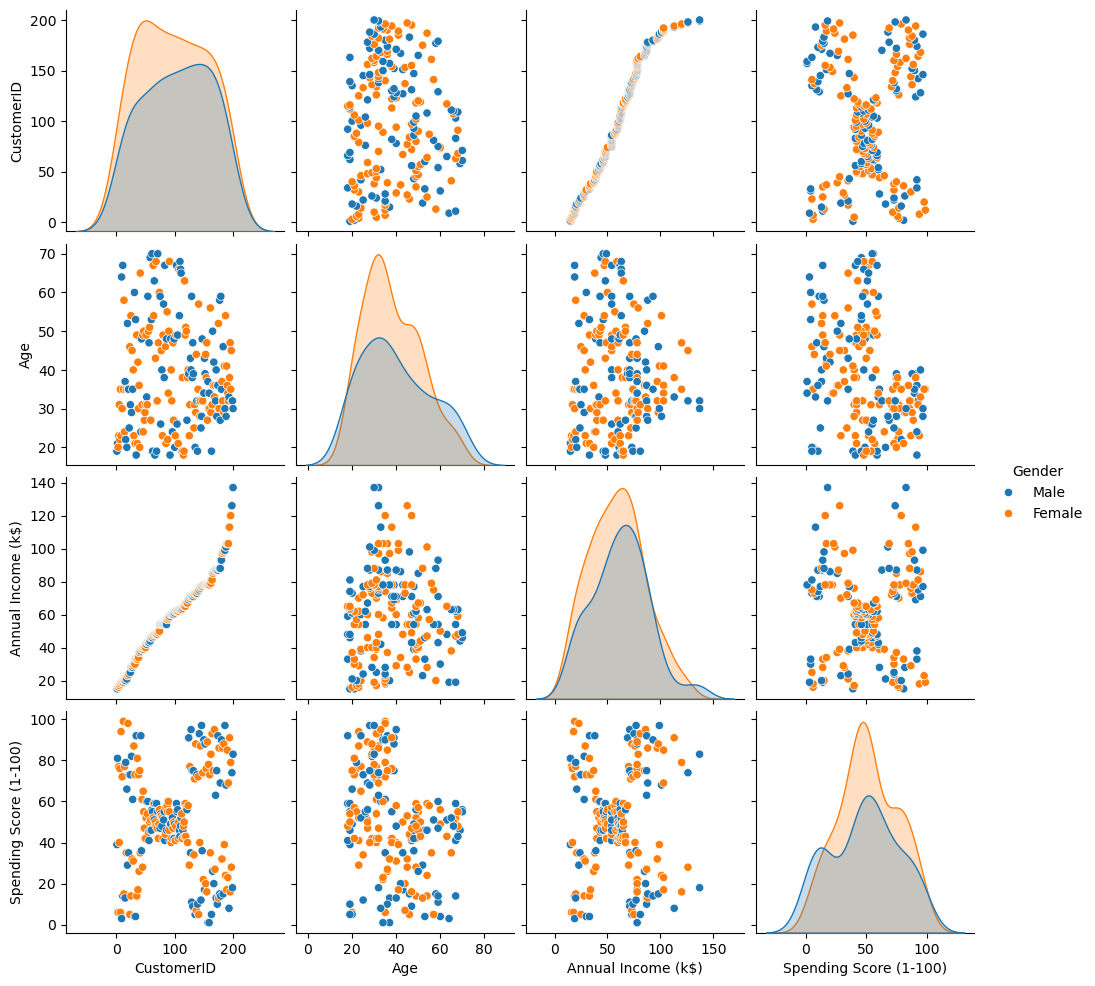

In [115]:
#customer_dataframe=customer_dataframe.drop('CustomerID', axis=1)
sns.pairplot(customer_dataframe, hue='Gender')

In [116]:
# Mean values of columns by gender
customer_dataframe.groupby(['Gender'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [117]:
customer_dataframe.corr(numeric_only=True)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

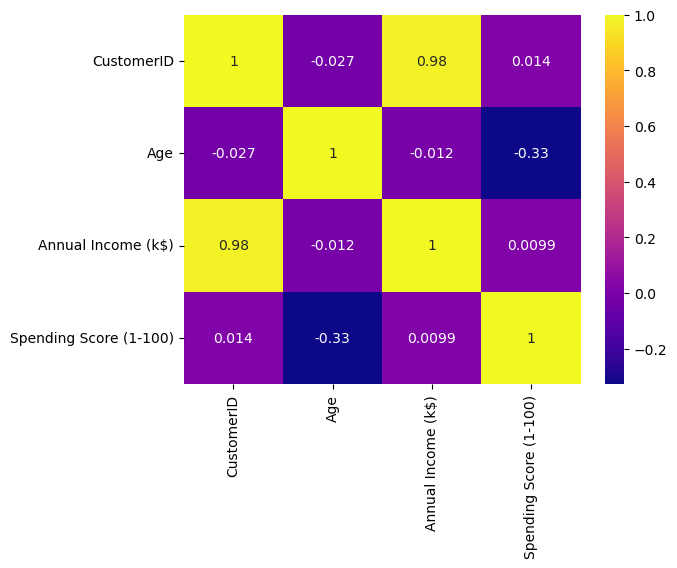

In [118]:
sns.heatmap(customer_dataframe.corr(numeric_only=True), annot=True,cmap='plasma')

In [119]:
# Performing KMeans Clustering - Univariate, Bivariate, Multivariate

In [120]:
kmeans_cluster = KMeans(n_clusters=3)

kmeans_cluster.fit(customer_dataframe[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [121]:
kmeans_cluster.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [122]:
customer_dataframe['Income Cluster'] = kmeans_cluster.labels_

customer_dataframe

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,1
197,198,Male,32,126,74,1
198,199,Male,32,137,18,1


In [123]:
customer_dataframe['Income Cluster'].value_counts()

Income Cluster
0    90
2    58
1    52
Name: count, dtype: int64

In [124]:
kmeans_cluster.inertia_

25642.577306218685

In [125]:
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(customer_dataframe[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [126]:
inertia_scores

[137277.28000000003,
 48660.88888888889,
 25341.28587186322,
 13308.108021390373,
 8667.679614837509,
 5430.245925925927,
 4600.904761904763,
 3106.711599511599,
 2230.430554412908,
 1860.5061624649861]

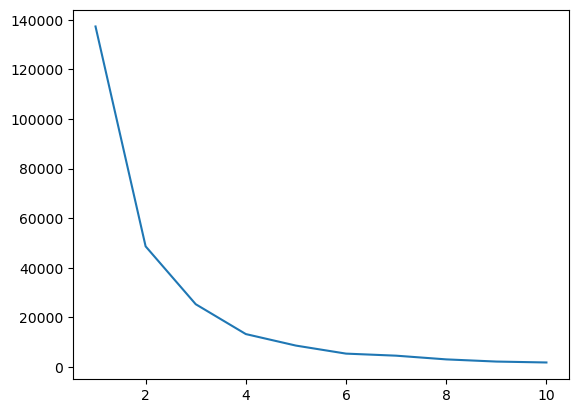

In [127]:
plt.plot(range(1,11), inertia_scores)

In [128]:
customer_dataframe.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [129]:
customer_dataframe.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,40.922222,61.622222,50.533333
1,37.192308,93.307692,50.192308
2,37.120690,29.551724,49.689655


In [130]:
# Bivariate Clustering

kmeans_cluster_bivariate = KMeans(n_clusters=5)
kmeans_cluster_bivariate.fit(customer_dataframe[['Annual Income (k$)', 'Spending Score (1-100)']])
customer_dataframe['Spending and Income Cluster'] = kmeans_cluster_bivariate.labels_

customer_dataframe

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,2,3
1,2,Male,21,15,81,2,4
2,3,Female,20,16,6,2,3
3,4,Female,23,16,77,2,4
4,5,Female,31,17,40,2,3
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,2
196,197,Female,45,126,28,1,1
197,198,Male,32,126,74,1,2
198,199,Male,32,137,18,1,1


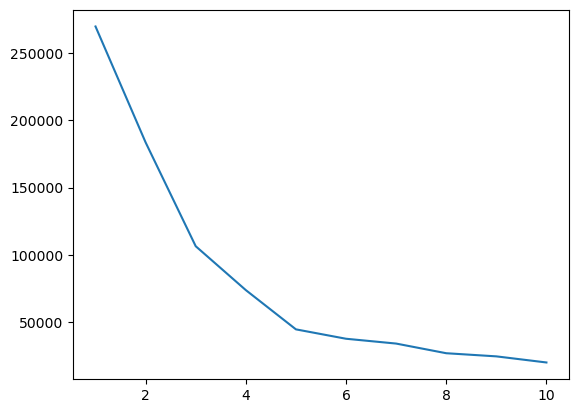

In [131]:
inertia_scores_bivariate=[]
for i in range(1,11):
    kmeans_2=KMeans(n_clusters=i)
    kmeans_2.fit(customer_dataframe[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores_bivariate.append(kmeans_2.inertia_)

plt.plot(range(1,11), inertia_scores_bivariate)

In [132]:
cluster_centers_bivariate = pd.DataFrame(kmeans_cluster_bivariate.cluster_centers_)
cluster_centers_bivariate.columns = ['x' , 'y']
cluster_centers_bivariate

,x,y
0,55.087500,49.712500
1,87.750000,17.583333
2,86.538462,82.128205
3,26.304348,20.913043
4,25.727273,79.363636


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

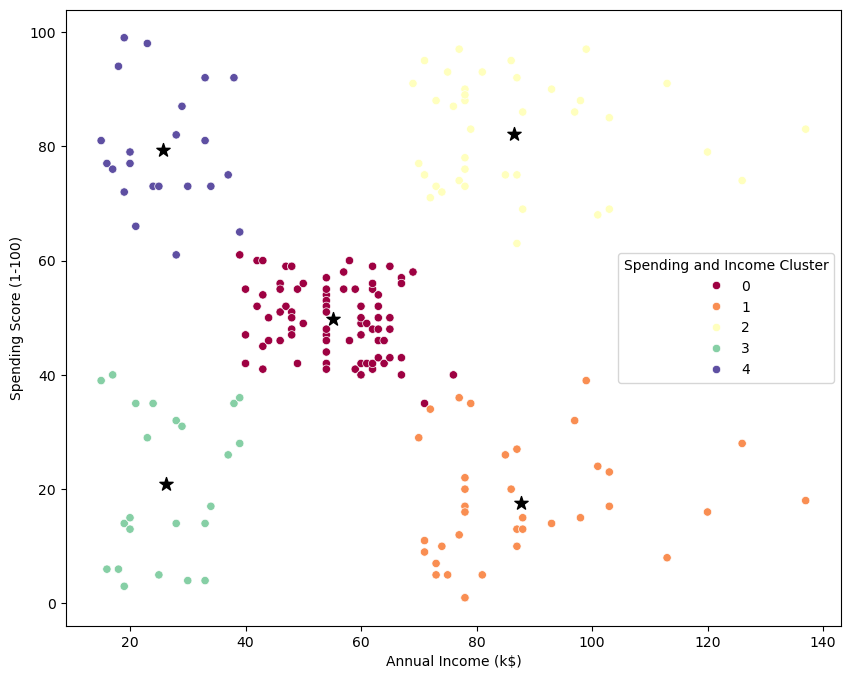

In [133]:
plt.figure(figsize=(10,8))
plt.scatter(x=cluster_centers_bivariate['x'],y=cluster_centers_bivariate['y'],s=100,c='black',marker='*')
sns.scatterplot(data=customer_dataframe, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending and Income Cluster', palette='Spectral')

In [134]:
pd.crosstab(customer_dataframe['Spending and Income Cluster'], customer_dataframe['Gender'], normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.587500,0.412500
1,0.472222,0.527778
2,0.538462,0.461538
3,0.608696,0.391304
4,0.590909,0.409091


In [135]:
customer_dataframe.groupby(['Spending and Income Cluster'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.937500,55.087500,49.712500
1,40.666667,87.750000,17.583333
2,32.692308,86.538462,82.128205
3,45.217391,26.304348,20.913043
4,25.272727,25.727273,79.363636


In [138]:
# Multivariate Clustering

scale = StandardScaler()
customer_dataframe_dummies = pd.get_dummies(customer_dataframe, drop_first=True)

In [139]:
customer_dataframe_dummies

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,2,3,True
1,2,21,15,81,2,4,True
2,3,20,16,6,2,3,False
3,4,23,16,77,2,4,False
4,5,31,17,40,2,3,False
...,...,...,...,...,...,...,...
195,196,35,120,79,1,2,False
196,197,45,126,28,1,1,False
197,198,32,126,74,1,2,True
198,199,32,137,18,1,1,True


In [140]:
customer_dataframe_dummies.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [141]:
customer_dataframe_dummies = customer_dataframe_dummies[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]

In [142]:
customer_dataframe_dummies

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False
...,...,...,...,...
195,35,120,79,False
196,45,126,28,False
197,32,126,74,True
198,32,137,18,True


In [144]:
customer_dataframe_dummies = pd.DataFrame(scale.fit_transform(customer_dataframe_dummies))

customer_dataframe_dummies

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152


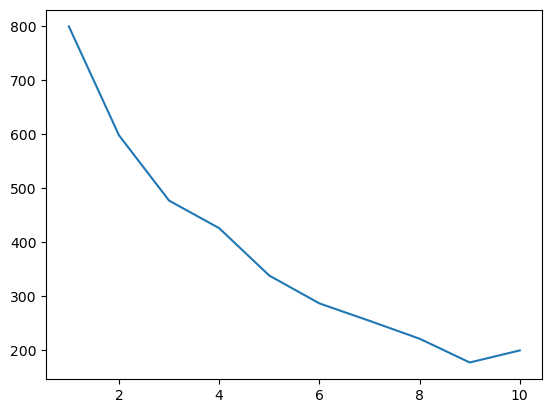

In [146]:
inertia_scores_multivariate=[]
for i in range(1,11):
    kmeans_3=KMeans(n_clusters=i)
    kmeans_3.fit(customer_dataframe_dummies)
    inertia_scores_multivariate.append(kmeans_3.inertia_)

plt.plot(range(1,11), inertia_scores_multivariate)